# A importância de escalar as features e quais ferramentas usar

Escalar é um passo essencial quando se quer treinar a maioria dos algoritimos de machine learning, por exemplo, o algoritimo K-Nearest Neighbors usa a distância para prever um ponto, então vamos experimentar com um dataset fictício para ver a razão disso.

Imagine que temos um dataset de mm de chuva médio de um lugar em um determinado período de tempo e temos a altura média de um determinado tipo de planta nessa região

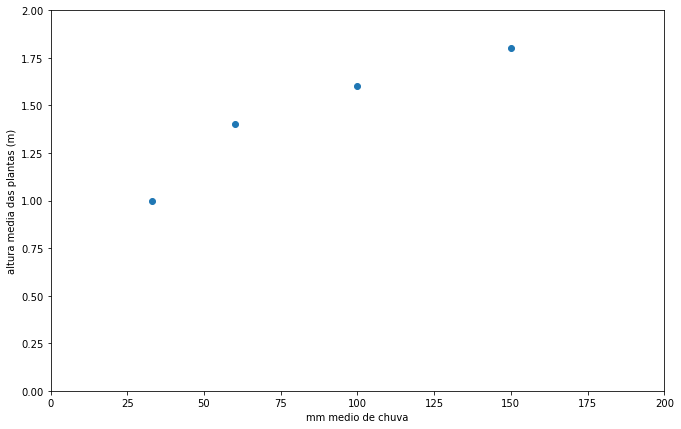

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

#2 dimensoes: mm medio de chuva de um lugar | altura media das plantas (m)
dataset = [[33, 1], 
           [60, 1.4], 
           [100, 1.6], 
           [150, 1.8]]

fig = plt.figure(figsize=(11,7))
plt.xlabel('mm medio de chuva')
plt.ylabel('altura media das plantas (m)')
plt.xlim(0,200)
plt.ylim(0,2)

plt.scatter([row[0] for row in dataset], [row[1] for row in dataset])
plt.show()

### Agora vamos tentar calcular a distância do segundo ponto em relação ao primeiro ponto e ao terceiro, simulando um algoritimo de distância como o KNN

In [6]:
from scipy.spatial.distance import euclidean

print(euclidean(dataset[1], dataset[0])) #ponto 2 com ponto 1

print(euclidean(dataset[1], dataset[2])) #ponto 2 com ponto 3

27.00296280040396
40.00049999687504


## Essas distâncias podem não dizer muita coisa, você pode achar estranho elas terem dado tão diferente quando no gráfico elas parecem bem semelhantes, mas vamos chegar lá, mas agora vamos repetir esse mesmo código mas com o dataset escalado

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dataset)
dataset_escalado = scaler.transform(dataset)
dataset_escalado

array([[0.        , 0.        ],
       [0.23076923, 0.5       ],
       [0.57264957, 0.75      ],
       [1.        , 1.        ]])

In [8]:
#agora que foi escalado, vamos calcular as distâncias 
print(euclidean(dataset_escalado[1], dataset_escalado[0])) #ponto 2 com ponto 1
print(euclidean(dataset_escalado[1], dataset_escalado[2])) #ponto 2 com ponto 3

0.5506854255106289
0.4235353210349987


## Dessa vez a diferença realmente parece bem mais similar, vamos tentar entender a razão da primeira estar tão diferente da versão escalada

### Vamos pegar o dataset não escalado novamente, mas dessa vez vamos modificá-lo, vamos fazer com que a altura média das plantas no ponto 2 vá de 1.4m para 1m, isso é pra ser muita coisa, visto que a altura varia apenas 0.8m no dataset

In [9]:
dataset_modificado = [[33, 1], [60, 1], [100, 1.6], [150, 1.8]]

print(euclidean(dataset[1], dataset[0]))
print(euclidean(dataset[1], dataset[2]))

27.00296280040396
40.00049999687504


## Mesmo com uma mudança relevante no dataset, as distâncias estão basicamente iguais a antes, a razão disso é que modificamos apenas a altura média e a altura média esta em uma escala muito pequena (cerca de 1m a 2m) comparado à escala de mm de chuva (cerca de 30mm a 150mm), então com os dados não escalados, a altura é quase irrelevante na distância 

In [10]:
#se fizermos a mesma coisa com os dados normalizados:
scaler = MinMaxScaler()
scaler.fit(dataset_modificado)
dataset_modificado_escalado = scaler.transform(dataset_modificado)
print(euclidean(dataset_modificado_escalado[1], dataset_modificado_escalado[0]))
print(euclidean(dataset_modificado_escalado[1], dataset_modificado_escalado[2]))

0.23076923076923078
0.8242464244170061


## Perceba como com os dados escalados essa modificação no dataset fez uma diferença absurda nas distâncias (foi de 0.55 e 0.42 para 0.23 e 0.82)

### Agora vamos tentar entender porque no primeiro as distâncias eram muito parecidas mas quando a calculamos deu tão diferente: o motivo é porque aquele gráfico é enganoso, eu decidi escalar o eixo y de modo que os pontos ficassem de uma forma melhor visualmente, vamos criar o mesmo gráfico novamente, mas dessa vez setando a mesma escala no eixo x e y

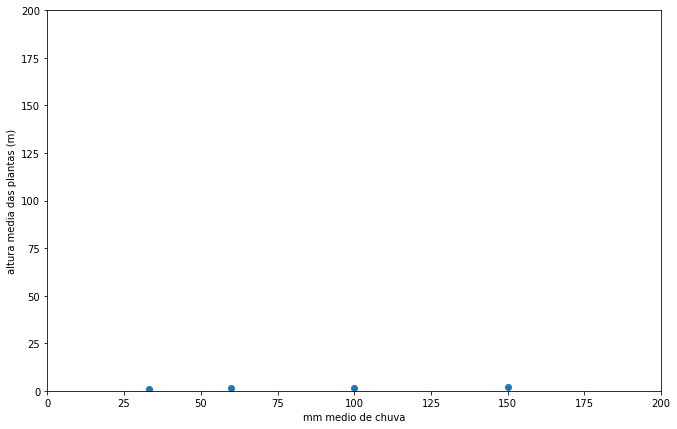

In [11]:
fig = plt.figure(figsize=(11,7))
plt.xlabel('mm medio de chuva')
plt.ylabel('altura media das plantas (m)')

plt.xlim(-10,200)
plt.ylim(-10,200) #dessa vez com o mesmo limite para os 2 axis

plt.scatter([row[0] for row in dataset], [row[1] for row in dataset])
plt.show()

## Agora esse gráfico mostra porque a altura é quase irrelevante na distância, mas se repetirmos isso mais uma vez, porém com os dados normalizados:

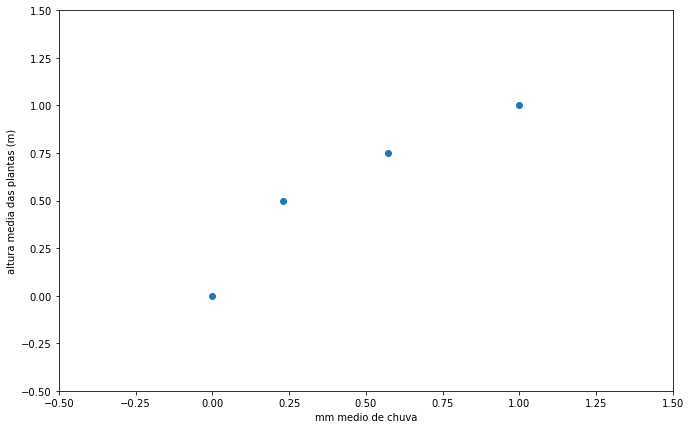

In [14]:
fig = plt.figure(figsize=(11,7))
plt.xlabel('mm medio de chuva')
plt.ylabel('altura media das plantas (m)')

plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5) #mesmo limite para os 2 axis

plt.scatter([row[0] for row in dataset_escalado], [row[1] for row in dataset_escalado])
plt.show()

## Agora sim vemos que o nosso escalador conseguiu deixar o eixo x e o eixo y relevantes

# Quando escalar os dados?

### Ha ainda outras razoes para se escalar os dados, alem de quando se usa KNN, por exemplo:
-PCA: o PCA é uma ferramenta que consegue reduzir a dimensionalidade de um dataset com mínima perda de informação, sua fórmula pode não ser tão simples de entender, mas ele tenta usar as variáveis que variam mais e, obviamente, variáveis com magnitudes muito altas variam mais, como no exemplo que fizemos, o media de chuva em mm teria preferencia pois ela varia na casa de dezenas e ate centenas, enquanto a altura nao passa de 1m de desvio.

-Gradient Descent: uma ferramenta usada em regressão linear e redes neurais que é otimizada quando se usa dados normalizados.

No geral, é bom escalar os dados quando uma ferramenta baseada em distância vai ser utilizada.

## Algoritimos que sao afetados positivamente por feature scaling:
-KNN

-K-Means

-Logistic regression, SVM, neural networks (baseados no gradient descent)

-Linear discriminant analysis, principal component analysis e kernel principal component analysis

-Basicamente todos os algoritimos de machine learning que nao são baseados em decision tree

## Min-Max Scaler:
O escalador que usamos nesse exemplo se chama min-max e nele os dados sao escalados entre 0 e 1 e, diferente da estratégia de standardization, esse limite pode ter um efeito negativa na existência de outliers. Essa ferramenta segue a seguinte formula:

Xnorm = (X−Xmin)/(Xmax−Xmin)

Esse escalador acaba sendo bom quando os dados não seguem a distribuição normal, o que também significa que é boa com algoritimos que nao assumem essa distribuição, como neural networks ou KNN.

### Grande desvantagem: outliers
Se copiarmos o mesmo código de modificar o dataset de antes, mas dessa vez fizermos o primeiro ponto ser um outlier, vamos ver algo interessante sobre esse escalador. Se fizermos a média de altura de determinada planta um absurdo 50 metros, o dataset vai ficar tao desproporcional quanto antes, pois o min-max scaler usa os valores minimos e maximos para se basear no range de 0 a 1

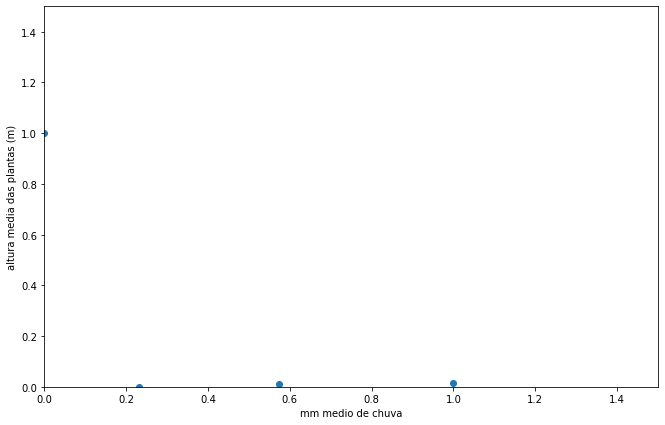

In [15]:
dataset_modificado2 = [[33, 50], [60, 1], [100, 1.6], [150, 1.8]]
scaler2 = MinMaxScaler()
scaler2.fit(dataset_modificado2)
dataset_modificado_escalado2 = scaler2.transform(dataset_modificado2)

fig = plt.figure(figsize=(11,7))
plt.xlabel('mm medio de chuva')
plt.ylabel('altura media das plantas (m)')
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)

plt.scatter([row[0] for row in dataset_modificado_escalado2], [row[1] for row in dataset_modificado_escalado2])
plt.show()

## Standardization ou Z-score
Essa estratégia de escalar os dados surge como uma solução para esse problema com outliers.

Os dados vão ser escalados de modo que eles vão ter as propriedades de uma distribuição normal em que a média é zero e o desvio padrão é 1, o que tiver acima da média é positivo e o que tiver abaixo é negativo. Como ele nao é limitado como o min-max scaler, outliers não vão afetar tanto e pode ser uma boa ideia usar quando se sabe que os dados seguem uma distribuicao normal.

Um problema pode ser que os dados não vão estar exatamente em uma mesma escala, em um dataset, uma feature pode ir de -3 a 3 e outra de -2.5 a 2.5 por exemplo, mas ainda eh muito melhor do que não escalar.

O Z-score tem a seguinte fórmula:
 (perceba que ele ainda é afetado por outliers, pois usa a média, então ainda é melhor remover os outliers antes de escalar)
Xnorm = (X-média)/desvio padrão

# Conclusões
  É bastante claro que escalar os dados é fundamental para que se possa realizar algumas tarefas relacionadas à machine learning e existem 2 escaladores muito conhecidos e usados frequentemente.
O escalador min-max não consegue lidar tão bem com outliers, mas nada impede que os outliers sejam tratados/removidos antes de se escalar os dados. Ele consegue deixar os dados exatamente na mesma escala e também  funciona bem com dados que não seguem a distribuição normal, então deve ser uma boa estratégia ver a distribuição dos dados anteriormente, pois se não for normal, usar o min-max é uma boa ideia. Já o escalador Z-score consegue funcionar bem mesmo na presença de outliers e funciona muito bem com dados em uma distribuição normal, então eu provavelmente o usaria quando encontrasse uma distribuição normal.